In [35]:
# 1. Seleccionar 2 imagenes que requieran una mejora de contraste
# 2. Aplica 2 tecnicas que permitan mejorar el contraste
# una con dev propio y otra con OpenCV
# 3. Aplica las dos tecnicas a las 2 imagenes
# 4. Describe como seleccionaste la mejor tecnica para el ajuste de intensidad
# 5. Describe caracteristicas de las tecnicas seleccionadas
# 6. Compara y concluye

In [36]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

### Definir imagenes a utilizar

In [37]:
img01 = cv2.imread("r1.png", cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread("p2.jpg", 1)

### Crear funciones reutilizables

In [38]:
# Funcion para calcular el histograma de los 3 canales de una imagen
# https://www.geeksforgeeks.org/python-opencv-cv2-calchist-method/
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Agregar plots
    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    
    
    # Titulos de referencia
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Mostrar
    plt.show()

In [51]:
# Funcion para abstraer el codigo para mostrar una imagen
def imshow(title="Image", image = None, size = 10):
    
    # Obtener el ancho y alto de la imagen
    w, h = image.shape[0], image.shape[1]
    
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [81]:
# Mostrar varias imagenes en la misma fila
def show_images(images_list: list):
    
    # Ancho y Alto
    plt.figure(figsize=(20, 5))
    
    # Iterar el arreglo y hacer destructuring de image y title
    for i, (image, title) in enumerate(images_list):
        
        # Definir subplot, pasandole numero de filas, columnas, indice
        plt.subplot(1, 3, i + 1)
        
        # Imagen a mostrar
        plt.imshow(image, cmap="gray")
        
        # Agregar el titulo
        plt.title(title)
        
        # Ocultar ejes
        plt.axis("off")

    plt.show()

In [63]:
# Invertir una imagen util para mejorar la interpretación de un ultrasonido
def invert_color(image = None, title = ""):
    
    # Obtener ancho y alto
    h, w = image.shape[0], image.shape[1] 
    print(h)
    print(w)

    # Generar un arreglo de 0, con las dimensiones de la imagen
    imgInvert = np.zeros((h, w), np.uint8)

    for j in range(h):
        for i in range(w):
            newValue = 0
            
            # Obtener el valor actual del pixel en el indice [j,i]
            valor_actual = image[j, i]
            
            # Ajustar los valores para obtener el resultado deseado
            if (valor_actual > 200):
                newValue = int((255 - image[j, i]) - 100)
                            
            if (valor_actual < 30):
                newValue = int((255 - image[j, i]) + 50)
            else:
                newValue = int((255 - image[j, i]))

            # En la posicion del pixel asignamos el valor generado
            # La funcion de numpy.clip nos permite limitar los valores con el rango definido.
            imgInvert[j, i] = np.clip(newValue, 0, 255)
            
            return imgInvert
            
    # Mostrar el resultado
    imshow("invert_color", imgInvert)

In [42]:
# Mejorar el contraste de una imagen, la he parametrizado para ajustar segun la necesidad de la imagen a procesar
def mejora_contraste(azul = 0, verde = 10, rojo = 0):
    # Definir constantes a sumar a cada canal
    c_azul = azul
    c_verde = verde
    c_rojo = rojo
    
    # Obtener los canales de una imagen cv2.split(img) -> Retorna las 3 capas BGR
    canal_azul, canal_verde, canal_rojo = cv2.split(img02)
    
    # Crear constantes para guardar la suma de nuestros parametros + el valor del actual del canal
    c_azul_const = np.clip(canal_azul.astype(int) + c_azul, 0, 255).astype(np.uint8)
    c_verde_const = np.clip(canal_verde.astype(int) + c_verde, 0, 255).astype(np.uint8)
    c_rojo_const = np.clip(canal_rojo.astype(int) + c_rojo, 0, 255).astype(np.uint8)
    
    # Fusionar nuestros 3 canales procesados
    imagen_final = cv2.merge((c_azul_const, c_verde_const, c_rojo_const))
    
    # Mostrar imagen
    plt.imshow(cv2.cvtColor(imagen_final, cv2.COLOR_BGR2RGB))
    plt.title('imagen')
    plt.show()
    
    return imagen_final
    

In [43]:
# Restar intensidad a una imagen
def restar_intensidad(valor = 40):
    
    # Generar matriz de 0 y la multiplicamos * 40
    # Cada indice de nuestro arreglo tendra el valor de
    M = np.ones(img02.shape, dtype = "uint8") * valor
    
    # Generar nueva imagen, realizando una funcion para cambiar el color de nuestro pixel
    # Al pixel actual le restamos nuestro valor parametrizado
    img_resta = np.clip(img02.astype(np.int16) - M, 0, 255).astype(np.uint8)
    
    # Mostrar imagen
    plt.imshow(cv2.cvtColor(img_resta, cv2.COLOR_BGR2RGB))
    plt.title('resta')
    plt.show()
    
    # Retornar la imagen obtenida
    return img_resta

In [ ]:
def ecualizar_imagen(imagen = None):
    b, g, r = cv2.split(imagen)
    
    # Ecualizar el canal de valor (V)
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)

    # Fusionar los canales nuevamente en la imagen HSV
    equ_image = cv2.merge([equ_b,equ_g,equ_r])
    imshow("ecualizada",equ_g)

    hist = cv2.calcHist(equ_image, [0], None, [256], [0, 256])
    plt.plot(hist)

In [ ]:
def plot_rgb_histograms(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular los histogramas de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Graficar los histogramas
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.plot(hist_b, color='blue')
    plt.title('Histograma Canal Azul')

    plt.subplot(3, 1, 2)
    plt.plot(hist_g, color='green')
    plt.title('Histograma Canal Verde')

    plt.subplot(3, 1, 3)
    plt.plot(hist_r, color='red')
    plt.title('Histograma Canal Rojo')

    plt.tight_layout()
    plt.show()

In [46]:
# Mostrar todos los canales
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [68]:
# Correcion gama
# https://docs.opencv.org/3.4/d2/de8/group__core__array.html
def contraste_openCV(image = None, value = 1.0, title = ""):
    img_corrected = cv2.pow(image, value)
    ## imshow(title, img_corrected)
    return img_corrected


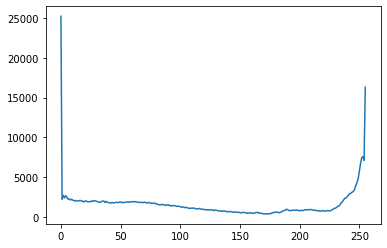

array([[25219.],
       [ 2233.],
       [ 2711.],
       [ 2397.],
       [ 2674.],
       [ 2490.],
       [ 2238.],
       [ 2288.],
       [ 2134.],
       [ 2221.],
       [ 2111.],
       [ 2029.],
       [ 2087.],
       [ 1991.],
       [ 2035.],
       [ 2009.],
       [ 2096.],
       [ 2021.],
       [ 2009.],
       [ 1878.],
       [ 1975.],
       [ 2026.],
       [ 1930.],
       [ 1919.],
       [ 1911.],
       [ 1932.],
       [ 2041.],
       [ 1956.],
       [ 2070.],
       [ 2023.],
       [ 1969.],
       [ 1892.],
       [ 1846.],
       [ 1852.],
       [ 1950.],
       [ 2011.],
       [ 1995.],
       [ 1807.],
       [ 1962.],
       [ 1835.],
       [ 1824.],
       [ 1755.],
       [ 1768.],
       [ 1824.],
       [ 1751.],
       [ 1807.],
       [ 1833.],
       [ 1821.],
       [ 1804.],
       [ 1873.],
       [ 1901.],
       [ 1783.],
       [ 1858.],
       [ 1794.],
       [ 1869.],
       [ 1871.],
       [ 1902.],
       [ 1851.],
       [ 1880.

In [95]:
# Correccion Gama
#https://es.wikipedia.org/wiki/Correcci%C3%B3n_gamma
def generar_histograma(image = None):
    hist_full = cv2.calcHist([image], [0], None, [256], [0,256])
    plt.plot(hist_full)
    plt.show()
    return hist_full
generar_histograma(img02)

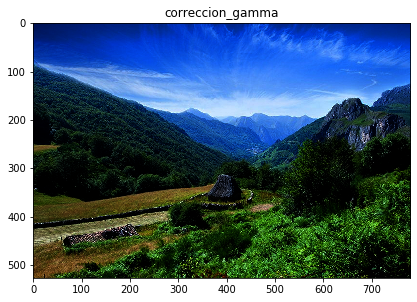

In [103]:
# Correccion Gama
def correccion_gamma(gamma = 0.0, imagen = None):
    nueva = np.empty((1, 256), np.uint8)
    
    for i in range(256):
        nueva[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
    res = cv2.LUT(imagen, nueva)
    return res
imshow("correccion_gamma", correccion_gamma(2.0, img02))

### Procesar imagen 1

In [62]:
# imshow("img niebla", img02)
invert_color(img02, "Color invertido img 02")
# imshow("IMG REFERENCIA", img01)

527
780


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

[[142 143 143 ... 176 176 176]
 [143 143 143 ... 177 177 177]
 [143 143 143 ... 178 178 178]
 ...
 [ 54  68  70 ...   0   0   0]
 [ 58  65  66 ...   1  13  28]
 [ 78  68  65 ...  63  60  48]]


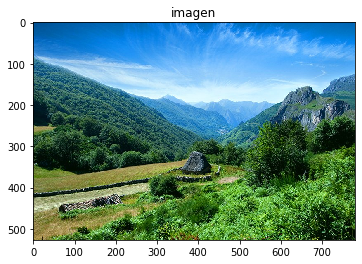

In [ ]:
mejora_contraste()

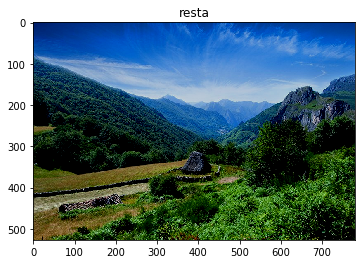

In [ ]:

restar_intensidad()

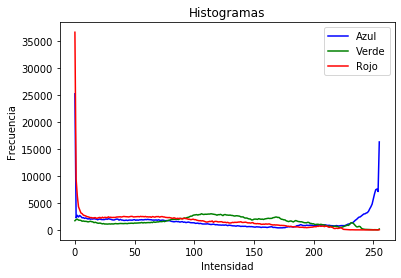

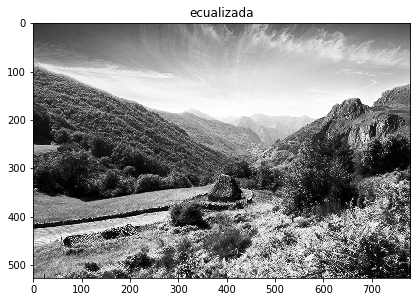

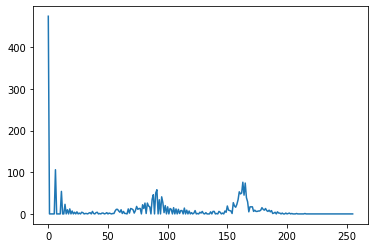

In [45]:

    
ecualizar_imagen(img02)

In [ ]:
plot_rgb_histograms(img02)

NameError: name 'plot_rgb_histograms' is not defined

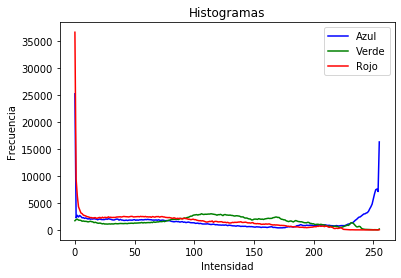

In [ ]:
plot_rgb_histogramTodo(img02)

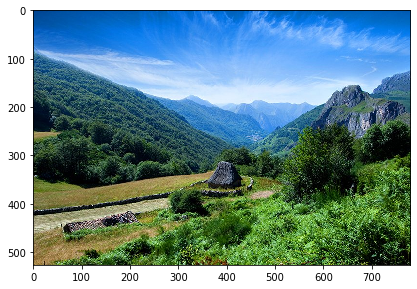

array([[[142,  66,   0],
        [143,  67,   1],
        [143,  67,   1],
        ...,
        [176,  87,   0],
        [176,  87,   0],
        [176,  87,   0]],

       [[143,  67,   1],
        [143,  67,   1],
        [143,  67,   1],
        ...,
        [177,  88,   0],
        [177,  88,   0],
        [177,  88,   0]],

       [[143,  68,   0],
        [143,  68,   0],
        [143,  68,   0],
        ...,
        [178,  90,   0],
        [178,  90,   0],
        [178,  90,   0]],

       ...,

       [[ 54, 115, 147],
        [ 68, 129, 161],
        [ 70, 131, 163],
        ...,
        [  0,  11,   0],
        [  0,  19,   0],
        [  0,  31,   5]],

       [[ 58, 119, 151],
        [ 65, 126, 158],
        [ 66, 127, 159],
        ...,
        [  1,  36,  10],
        [ 13,  53,  25],
        [ 28,  70,  39]],

       [[ 78, 139, 171],
        [ 68, 129, 161],
        [ 65, 126, 158],
        ...,
        [ 63, 109,  80],
        [ 60, 110,  78],
        [ 48, 102,  67]]

In [ ]:
contraste_openCV(img02)

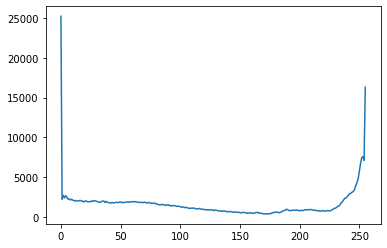

In [ ]:
generar_histograma(img02)

[[ 32   0   0   0  32   0   0   0  32   0   0   0  32   0   0   0  35   0
    0   0  32   0   0   0  71   0   0   0 101   0   0   0 110   0   0   0
  101   0   0   0 114   0   0   0  97   0   0   0 114   0   0   0  32   0
    0   0 117   0   0   0 110   0   0   0  32   0   0   0  97   0   0   0
  114   0   0   0 114   0   0   0 101   0   0   0 103   0   0   0 108   0
    0   0 111   0   0   0  32   0   0   0 100   0   0   0 101   0   0   0
   32   0   0   0  48   0   0   0  44   0   0   0  32   0   0   0  99   0
    0   0 111   0   0   0 110   0   0   0  32   0   0   0 108   0   0   0
   97   0   0   0 115   0   0   0  32   0   0   0 100   0   0   0 105   0
    0   0 109   0   0   0 101   0   0   0 110   0   0   0 115   0   0   0
  105   0   0   0 111   0   0   0 110   0   0   0 101   0   0   0 115   0
    0   0  32   0   0   0 100   0   0   0 101   0   0   0  32   0   0   0
  108   0   0   0  97   0   0   0  32   0   0   0 105   0   0   0 109   0
    0   0  97   0   0   0 103   0   0 

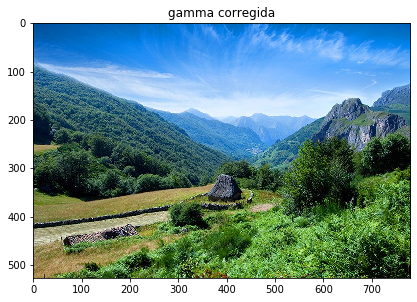

NameError: name 'generar_histograma' is not defined

In [65]:
correccion_gamma(0.9, img02)

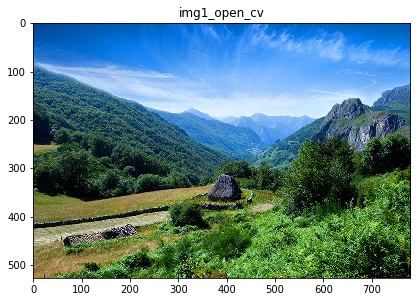

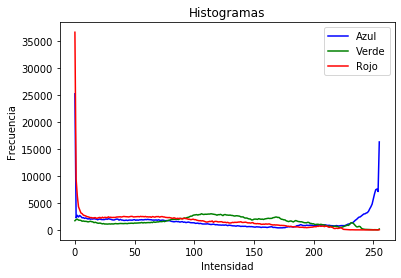

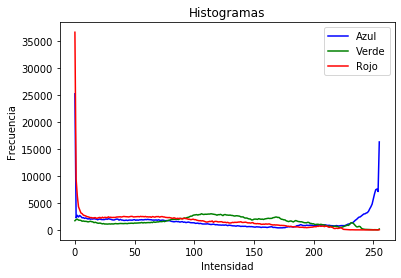

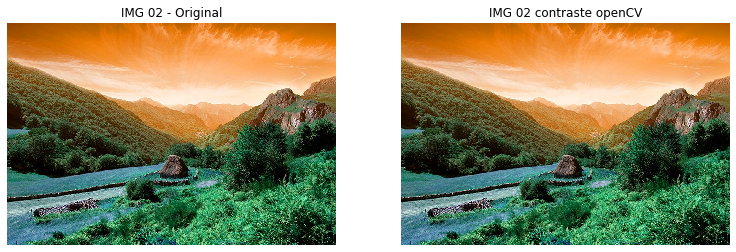

In [94]:
# IMG 01
img2_open_cv = contraste_openCV(img02, 1, "img2_open_cv")

imshow("img1_open_cv", img1_open_cv)

plot_rgb_histogramTodo(img02)


images_list = [(img02, "IMG 02 - Original"),
            (img2_open_cv, "IMG 02 contraste openCV")]

show_images(images_list)